In [1]:
# Import necessary packages
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

## Task 1: Feature Normalization (Data Conditioning)

In [2]:
data_test = scipy.io.loadmat('test_data.mat')
data_train = scipy.io.loadmat('train_data.mat')
X_train = data_train['x'].reshape(data_train['x'].shape[0], -1)
y_train = data_train['y'].flatten()
X_test = data_test['x'].reshape(data_test['x'].shape[0], -1)
y_test = data_test['y'].flatten()

In [3]:
# Compute the mean and standard deviation for each feature
mean = np.mean(X_train, axis=0)
std_dev = np.std(X_train, axis=0)

# Normalize both training and testing data
X_train_normalized = (X_train - mean) / std_dev
X_test_normalized = (X_test - mean) / std_dev

## Task 2: PCA using training samples

In [4]:
# Compute covariance matrix
cov_matrix = np.cov(X_train_normalized, rowvar=False)

# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Select the top 2 principal components
pc1 = eigenvectors[:, 0]
pc2 = eigenvectors[:, 1]

## Task 3:  Dimension reduction using PCA

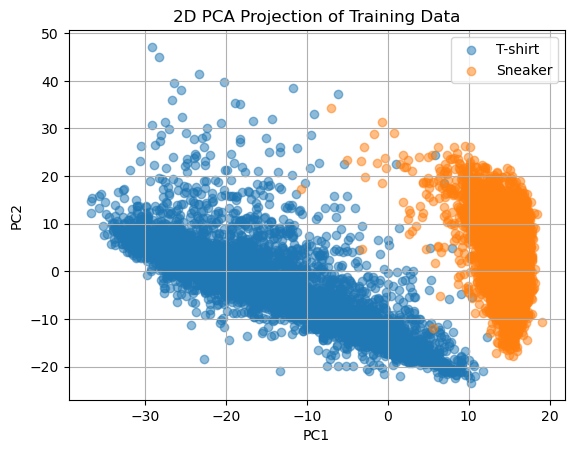

In [5]:
X_train_2d = X_train_normalized @ np.array([pc1, pc2]).T
X_test_2d = X_test_normalized @ np.array([pc1, pc2]).T

plt.scatter(X_train_2d[y_train == 0, 0], X_train_2d[y_train == 0, 1], alpha=0.5, label='T-shirt')
plt.scatter(X_train_2d[y_train == 1, 0], X_train_2d[y_train == 1, 1], alpha=0.5, label='Sneaker')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.legend()
plt.title('2D PCA Projection of Training Data')
plt.show()

## Task 4: Density Estimation

In [6]:
# Separate data by class
X_tshirt = X_train_2d[y_train == 0]
X_sneaker = X_train_2d[y_train == 1]

# Calculate mean and covariance for each class
mean_tshirt = np.mean(X_tshirt, axis=0)
cov_tshirt = np.cov(X_tshirt, rowvar=False)

mean_sneaker = np.mean(X_sneaker, axis=0)
cov_sneaker = np.cov(X_sneaker, rowvar=False)

## Task 5:  Bayesian Decision Theory for optimal classification

In [7]:
# Define distributions
dist_tshirt = multivariate_normal(mean=mean_tshirt, cov=cov_tshirt)
dist_sneaker = multivariate_normal(mean=mean_sneaker, cov=cov_sneaker)

# Predict for training set using Bayesian Decision Theory
train_preds = np.array([
    0 if dist_tshirt.pdf(sample) > dist_sneaker.pdf(sample) else 1
    for sample in X_train_2d
])
train_accuracy = np.mean(train_preds == y_train)

# Predict for testing set using Bayesian Decision Theory
test_preds = np.array([
    0 if dist_tshirt.pdf(sample) > dist_sneaker.pdf(sample) else 1
    for sample in X_test_2d
])
test_accuracy = np.mean(test_preds == y_test)

print(f'Training accuracy: {train_accuracy * 100:.2f}%')
print(f'Testing accuracy: {test_accuracy * 100:.2f}%')

Training accuracy: 99.75%
Testing accuracy: 99.90%


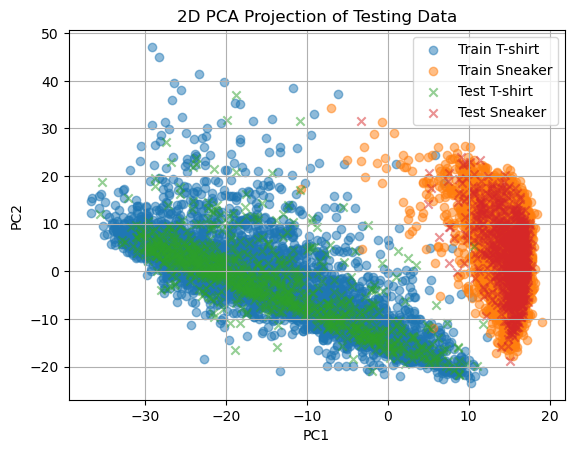

In [8]:
plt.scatter(X_train_2d[y_train == 0, 0], X_train_2d[y_train == 0, 1], alpha=0.5, label='Train T-shirt')
plt.scatter(X_train_2d[y_train == 1, 0], X_train_2d[y_train == 1, 1], alpha=0.5, label='Train Sneaker')
plt.scatter(X_test_2d[y_test == 0, 0], X_test_2d[y_test == 0, 1], alpha=0.5, label='Test T-shirt',marker='x')
plt.scatter(X_test_2d[y_test == 1, 0], X_test_2d[y_test == 1, 1], alpha=0.5, label='Test Sneaker',marker='x')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA Projection of Testing Data')
plt.legend()
plt.grid()
plt.show()